In [7]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.cluster import AffinityPropagation

# 1. Download price data

# 2012 to 2013
start = "2021-01-01"
end = "2024-06-13"

# Dow Jones symbols
symbols = ["AA", "AXP", "BA", "BAC", "CAT",
           "CSCO", "CVX", "DD", "DIS", "GE", "HD",
           "HPQ", "IBM", "INTC", "JNJ", "JPM",
           "KO", "MCD", "MMM", "MRK", "MSFT", "PFE",
           "PG", "T", "TRV", "VZ", "WMT", "XOM"]

quotes = []

for symbol in symbols:
    try:
        ticker = yf.Ticker(symbol)
        hist = ticker.history(start=start, end=end)
        quotes.append(hist['Close'])
    except Exception as e:
        print(symbol, "not found:", e)

# Combine data into a DataFrame
data = pd.concat(quotes, axis=1, keys=symbols).dropna()
close = data.values.T
print(close.shape)

# 2. Calculate affinity matrix
logreturns = np.diff(np.log(close), axis=1)
print(logreturns.shape)

logreturns_norms = np.sum(logreturns ** 2, axis=1)
S = - logreturns_norms[:, np.newaxis] - logreturns_norms[np.newaxis, :] + 2 * np.dot(logreturns, logreturns.T)

# 3. Cluster using affinity propagation
aff_pro = AffinityPropagation().fit(S)
labels = aff_pro.labels_

for i in range(len(labels)):
    print('%s in Cluster %d' % (symbols[i], labels[i]))
    

(28, 866)
(28, 865)
AA in Cluster 0
AXP in Cluster 1
BA in Cluster 2
BAC in Cluster 1
CAT in Cluster 3
CSCO in Cluster 4
CVX in Cluster 3
DD in Cluster 1
DIS in Cluster 1
GE in Cluster 1
HD in Cluster 4
HPQ in Cluster 5
IBM in Cluster 7
INTC in Cluster 6
JNJ in Cluster 7
JPM in Cluster 1
KO in Cluster 7
MCD in Cluster 7
MMM in Cluster 4
MRK in Cluster 7
MSFT in Cluster 4
PFE in Cluster 7
PG in Cluster 7
T in Cluster 7
TRV in Cluster 7
VZ in Cluster 7
WMT in Cluster 7
XOM in Cluster 3


Harris coords shape: (1347, 2)


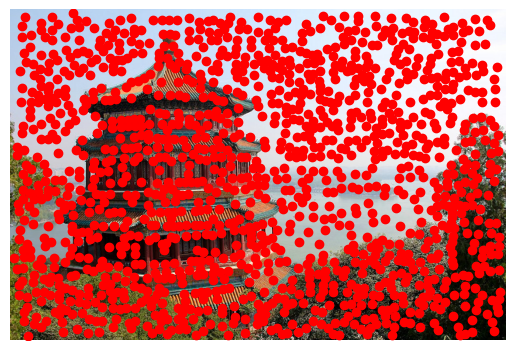

In [21]:
from sklearn.datasets import load_sample_images
from matplotlib.pyplot import imshow, show, axis, plot
import numpy as np
from skimage.feature import corner_harris, corner_peaks

# Load sample images
dataset = load_sample_images()
img = dataset.images[0]

# If the image has an alpha channel, remove it
if img.shape[2] == 4:
    img = img[:, :, :3]

# Convert image to grayscale if it has 3 channels
if img.ndim == 3:
    img_gray = np.mean(img, axis=2)
else:
    img_gray = img

# Compute Harris corners
harris_response = corner_harris(img_gray)
harris_coords = corner_peaks(harris_response, min_distance=5)

print("Harris coords shape:", harris_coords.shape)

# Extract y and x coordinates
y, x = harris_coords[:, 0], harris_coords[:, 1]

# Plot the image and the detected corners
axis('off')
imshow(img)
plot(x, y, 'ro')
show()


In [19]:
from scipy import integrate
import numpy as np

gaussian_integral = integrate.quad(lambda x: np.exp(-x**2), -np.inf, np.inf)
print("Gaussian integral:", np.sqrt(np.pi), gaussian_integral)


Gaussian integral: 1.7724538509055159 (1.7724538509055159, 1.4202637059452923e-08)


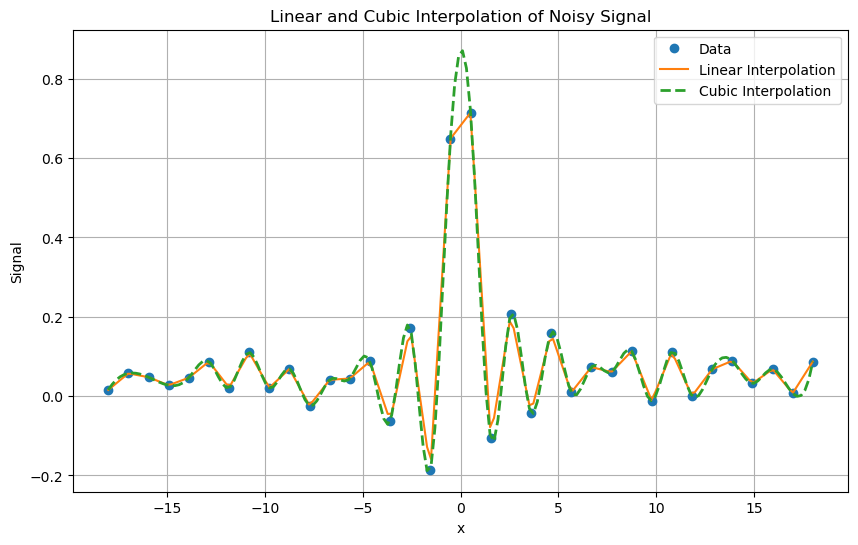

In [23]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(-18, 18, 36)
noise = 0.1 * np.random.random(len(x))
signal = np.sinc(x) + noise

# Linear interpolation
linear_interp = interpolate.interp1d(x, signal)
x2 = np.linspace(-18, 18, 180)
y_linear = linear_interp(x2)

# Cubic interpolation
cubic_interp = interpolate.interp1d(x, signal, kind="cubic")
y_cubic = cubic_interp(x2)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, signal, 'o', label="Data")
plt.plot(x2, y_linear, '-', label="Linear Interpolation")
plt.plot(x2, y_cubic, '--', lw=2, label="Cubic Interpolation")

# Adding labels and legend
plt.xlabel('x')
plt.ylabel('Signal')
plt.title('Linear and Cubic Interpolation of Noisy Signal')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import yfinance as yf
from datetime import date
import numpy as np
import sys

# Define the pos_confidence function directly
def pos_confidence(close_prices):
    # Placeholder implementation
    mean_price = np.mean(close_prices)
    return f"Mean closing price: {mean_price}"

# 1. Get close prices.
today = date.today()
start = date(today.year - 1, today.month, today.day)

# Fetch historical stock data
ticker = sys.argv[1]
data = yf.download(ticker, start=start, end=today)

# Extract closing prices
close = np.array(data['Close'])
print(pos_confidence(close))



ModuleNotFoundError: No module named 'binomial_proportion'